In [33]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [34]:
# Importing data

data=pd.read_csv("C:/Users/anike/Desktop/PROJECTS/churn/Telecome-Churn-Prediction-main/Telecom-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [35]:
# Making a copy:

df=data.copy()
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [36]:
# Shape of data:

df.shape

(7043, 21)

In [37]:
# Size of data:

df.size

147903

In [66]:
# Checking descriptive statistics:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [68]:
# Checking the information about the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [69]:
# Checking the null values:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
# Checking the duplicate values:

df.duplicated().sum()

0

In [72]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [78]:
# Columns unique:

df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
# No. of unique values:

df.columns.nunique()

21

<AxesSubplot:ylabel='TechSupport'>

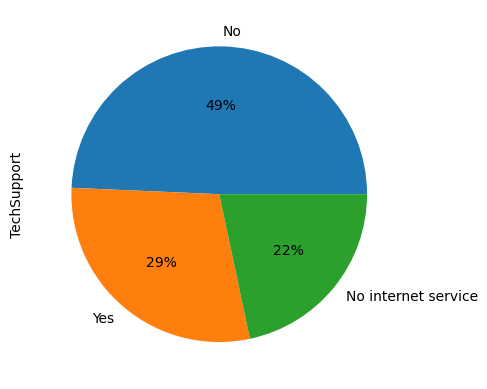

In [83]:
# Pie Chart how much constumer took tech support:

df['TechSupport'].value_counts().plot(kind='pie',autopct='%.0f%%')

- Here by seeing the pie chart we can say that most of the tech support is taken by customer is 29%.

- And thus the constomer which is not taken the tech support is upto 49%.

- And remaining constomers are not havin the internet service only that are upto 22%.


Text(0.5, 1.0, 'Churn')

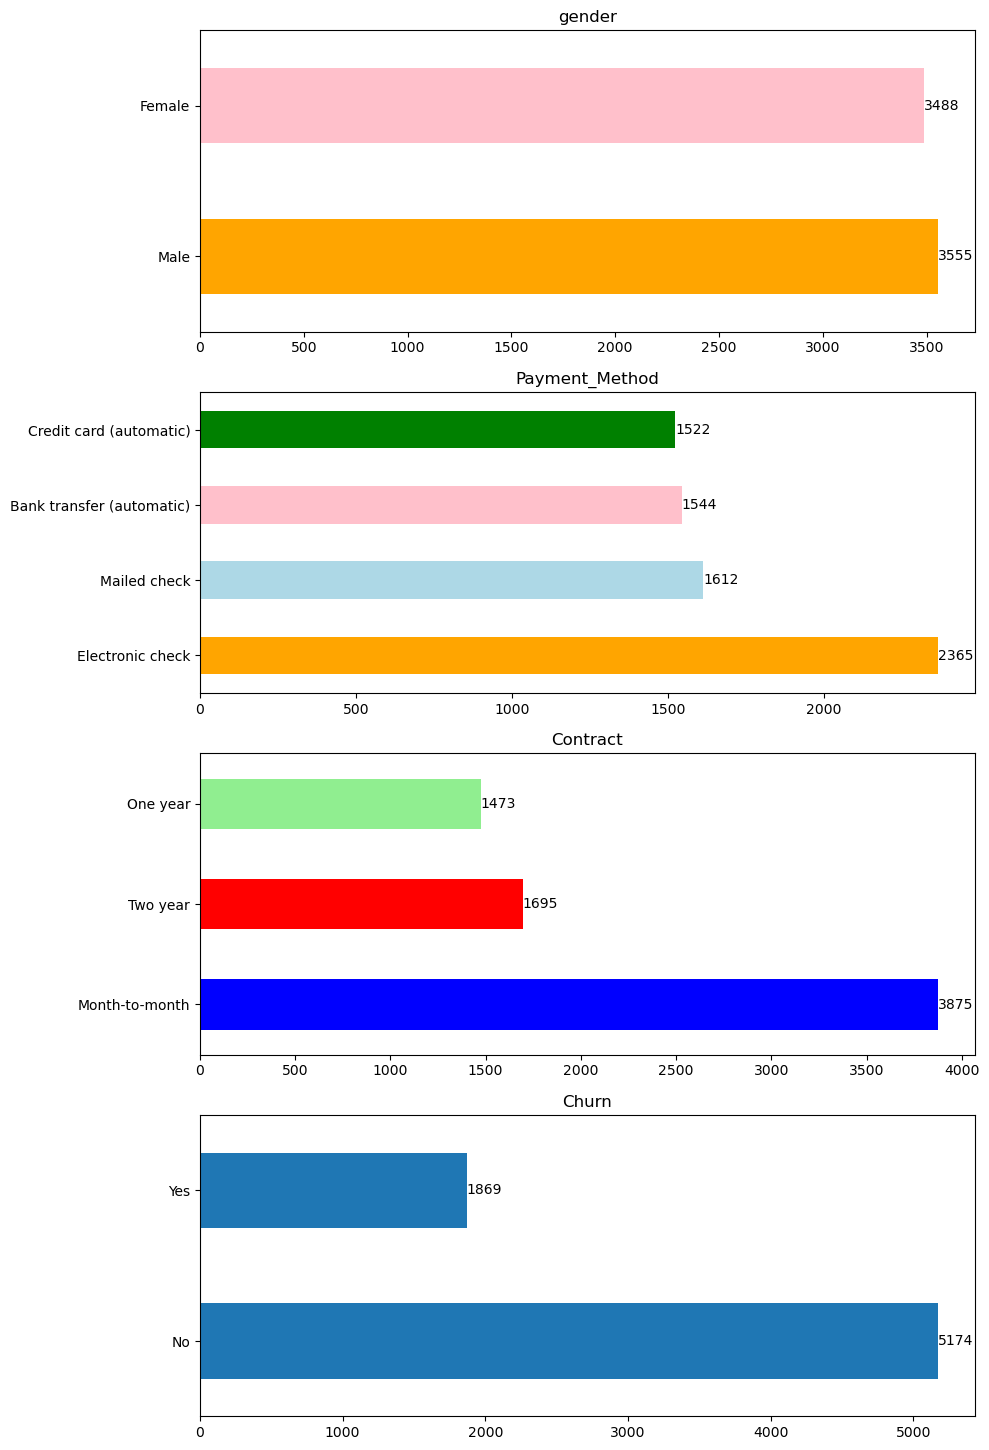

In [39]:
# Creating count plots:

figure,axesbi=plt.subplots(4,figsize=(10,18))

# Count plot with respect to PaymentMethod:

ax=df['gender'].value_counts(ascending=False).plot(kind='barh',ax=axesbi[0],color=['orange','pink'])
abs_values = df['gender'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('gender')

# Count plot with respect to PaymentMethod:

bx=df['PaymentMethod'].value_counts(ascending=False).plot(kind='barh',ax=axesbi[1],color=['orange','lightblue','pink','green'])
abs_values = df['PaymentMethod'].value_counts(ascending=False).values
bx.bar_label(container=bx.containers[0], labels=abs_values)
bx.set_title('Payment_Method')

# Count plot with respect to Contract:

cx=df['Contract'].value_counts(ascending=False).plot(kind='barh',ax=axesbi[2],color=['blue','red','lightgreen'])
abs_label=df['Contract'].value_counts(ascending=False).values
cx.bar_label(container=cx.containers[0], labels=abs_label)
cx.set_title('Contract')


# Count plot with respect to Churn:

dx=df['Churn'].value_counts(ascending=False).plot(kind='barh',ax=axesbi[3])
abs_label=df['Churn'].value_counts(ascending=False).values
dx.bar_label(container=dx.containers[0], labels=abs_label)
dx.set_title('Churn')


- Gender = Hence male has more number of counts as compared to female.

- PaymentMethod =  Hence Most of the payments are done with respect to electronic payment modes as compared to others.

- Contracts = Hence most of the contracts are with respect to Month_to_Month contracts.

- Churns = Hence most of the Churns are with respect to No only as compared to Yes ones.

In [99]:
df.head(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [40]:
# Hence dropping CustomerID column:

df=df.drop(['customerID'],axis=1)

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [42]:
# Converting String into Numeric by using Label encoder:

from sklearn.preprocessing import LabelEncoder

In [43]:
col = df.columns[df.dtypes=="object"]

for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [44]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [125]:
# Saving new csv file :

# df.to_csv("churn_final.csv")

In [45]:
# Dividing the data into depended and independed variables

X=df.iloc[:,0:19]
y=df.iloc[:,-1]

In [46]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466


In [138]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [47]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(X)
print(x)

[[-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.16032292
  -0.39860759]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.25962894
  -0.94876238]
 [ 0.99053183 -0.43991649 -0.96662231 ...  1.33486261 -0.36266036
  -1.64188328]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.39855772 -1.1686319
  -0.13968008]
 [ 0.99053183  2.27315869  1.03453023 ...  1.33486261  0.32033821
  -0.31653445]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.47405205  1.35896134
   1.13801338]]


In [48]:
# Splitting the data into train and test:

from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=0)

### 1. Logistic Regression

In [49]:
# Importing the Library:

from sklearn.linear_model import LogisticRegression

# Fitting the model:

model = LogisticRegression()
result = model.fit(X_train, y_train)

# Predicting the model:

prediction_test = model.predict(X_test)

# Accuracy score:

LR_accuracy=metrics.accuracy_score(y_test, prediction_test)

print (LR_accuracy)

0.7963094393186657


### 2. Random Forest Classifier

In [50]:
# Importing the library:

from sklearn.ensemble import RandomForestClassifier

# Fitting the model:

rf_model = RandomForestClassifier(random_state=50,max_features=100)
result = rf_model.fit(X_train, y_train)

# Predicting the model:

Prediction_test = rf_model.predict(X_test)

# Accuracy score:

RF_accuracy=metrics.accuracy_score(y_test, Prediction_test)

print (RF_accuracy)


0.7750177430801988


### 3. Support Vector Machine

In [51]:
# Importing the Library:

from sklearn.svm import SVC

# Fitting the model:

svm_model = SVC()
result = svm_model.fit(X_train, y_train)

# Predicting the model:

PPrediction_test = rf_model.predict(X_test)

# Accuracy score:

SVM_accuracy=metrics.accuracy_score(y_test, PPrediction_test)

print (SVM_accuracy)


0.7750177430801988


### 4. XGBClassifier

In [52]:
# Importing the Library:

from xgboost import XGBClassifier

# Fitting the model:

xgb= XGBClassifier()
result=xgb.fit(X_train, y_train)

# Predicting the model:

preds = xgb.predict(X_test)

# Accuracy score:

XGB_accuracy=metrics.accuracy_score(y_test, preds)

print (XGB_accuracy)


0.7799858055358411


### 5. AdaBoostClassifier

In [53]:
# Importing the Library:

from sklearn.ensemble import AdaBoostClassifier

# Fitting the model:

model = AdaBoostClassifier()
model.fit(X_train,y_train)

# Predicting the model:

Preds = model.predict(X_test)

# Accuracy score:

ADA_accuracy=metrics.accuracy_score(y_test, Preds)

print(ADA_accuracy)

0.7899219304471257


#### Storing all the accuracy in one dataframe

In [54]:
data={'Models':pd.Series(['Logistic Regression','Random Forest Classifier','Support Vector Machine','XGBClassifier','AdaBoostClassifier']),\
     'Accuracy':pd.Series([LR_accuracy,RF_accuracy,SVM_accuracy,XGB_accuracy,ADA_accuracy])}
Data=pd.DataFrame(data)
Data

,Models,Accuracy
0,Logistic Regression,0.796309
1,Random Forest Classifier,0.775018
2,Support Vector Machine,0.775018
3,XGBClassifier,0.779986
4,AdaBoostClassifier,0.789922


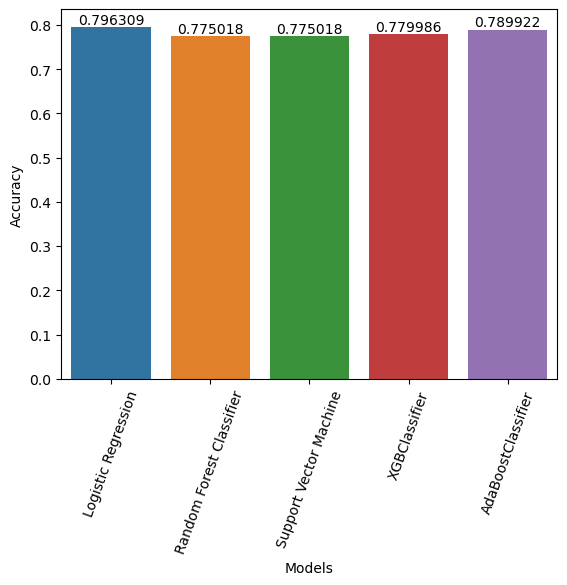

In [67]:
# Bar plot with respect to Models and its accuracy:

ax = sns.barplot(data=Data, x="Models", y="Accuracy")
plt.xticks(rotation=70)

for container in ax.containers:
    ax.bar_label(container)

As by seeing the accuracy we can say the logistic regression perform best as compared to other models with respect to accuracy.

In [167]:
# printing  classification_report for Logistic regression:

from sklearn.metrics import classification_report

print("Test report: ")
print(classification_report(y_test,prediction_test))

Test report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.49      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



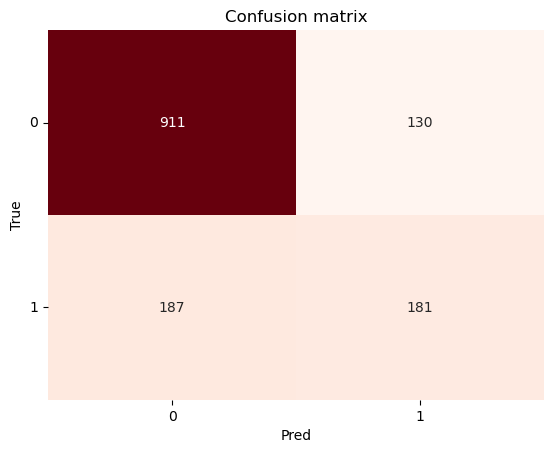

In [169]:
# Confusion matrix with respect to best accuracy score of Logistic regression model:

# Importing the library:
from sklearn import metrics

classes = np.unique(y_test)
confusion_matrix = metrics.confusion_matrix(y_test,prediction_test)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix, annot=True, fmt='d', ax=ax, cmap=plt.cm.Reds, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

- A confusion matrix is used for evaluating the performance of a machine learning model.

- As Diagonal elements of the confusion matrix they are correctly predicted samples, as compared to others.